In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [3]:
# Load the trajectory
traj = md.load_trr('../Inputs/T300/adp_exchange4temps.trr', top='../Inputs/T300/adp_exchange4temps.gro')

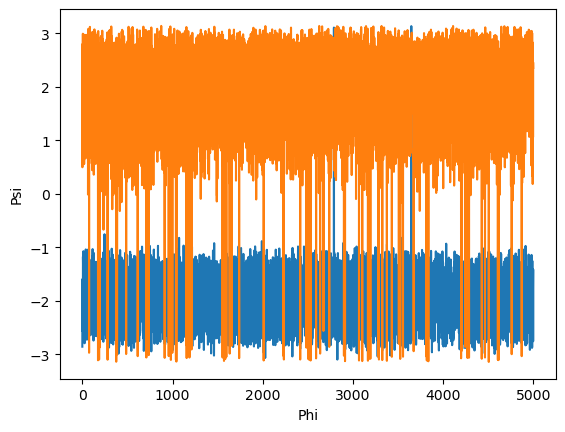

In [5]:
#Compute the phi and psi angles of the trajectory
phi, psi = md.compute_phi(traj), md.compute_psi(traj)

#plot phi and psi
plt.plot(phi[1][:,0], label='Phi (Degrees)')
plt.plot(psi[1][:,0], label='Psi (Degrees)')
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.show()

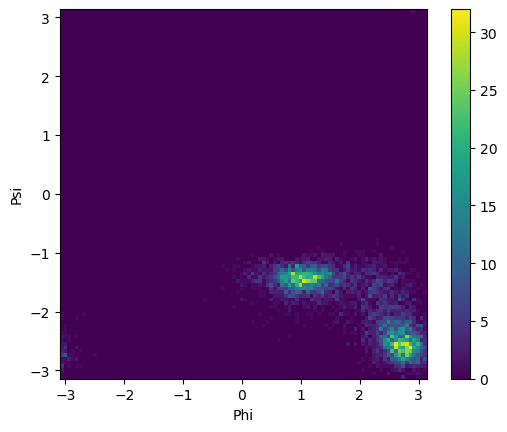

In [6]:
#compute 2d histogram of phi and psi
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=100)

#plot 2d histogram
plt.imshow(H, interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.colorbar()
plt.show()

In [30]:
#use xvg file to plot replicas and temperatures
xvg_300 = np.loadtxt('../Inputs/T300/replica_index.xvg')



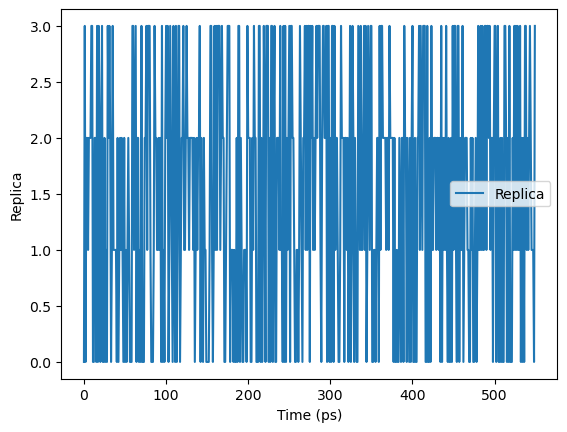

In [36]:
#plot replica and every 1000 time steps
#plt.plot(xvg_300[::1000,0], label='Replica')
plt.plot(xvg_300[::1000,1], label='Replica')
plt.xlabel('Time (ps)')
plt.ylabel('Replica')
plt.legend()



In [39]:
#plot energy at temperatures
xvg_300_energy = np.loadtxt('../Inputs/T300/energy.xvg',comments=["@","#"],unpack=True)
xvg_350_energy = np.loadtxt('../Inputs/T350/energy.xvg',comments=["@","#"],unpack=True)
xvg_400_energy = np.loadtxt('../Inputs/T400/energy.xvg',comments=["@","#"],unpack=True)
xvg_450_energy = np.loadtxt('../Inputs/T450/energy.xvg',comments=["@","#"],unpack=True)



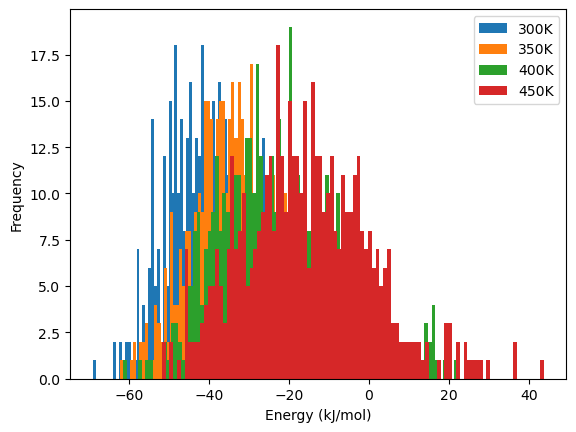

In [44]:
#make histogram of energy of each replica
plt.hist(xvg_300_energy[1], bins=100, label='300K')
plt.hist(xvg_350_energy[1], bins=100, label='350K')
plt.hist(xvg_400_energy[1], bins=100, label='400K')
plt.hist(xvg_450_energy[1], bins=100, label='450K')
plt.xlabel('Energy (kJ/mol)')
plt.ylabel('Frequency')
plt.legend()
plt.show()